# Titanic Classification

**Titanic Survival Prediction & Multiple plots**
Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio economic status, age, gender and more.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


# Import necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset

In [3]:
titanic = pd.read_csv('/kaggle/input/test-file/tested.csv')

# Explore the dataset

Display the first few rows of the DataFrame

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Display descriptive statistics of numerical columns

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Display descriptive statistics of all columns, including categorical ones

In [6]:
print(titanic.describe(include='all'))

        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique     

Display information about the DataFrame

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Missing values

Display the count of missing values for each column

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Calculate the percentage of missing values for each column

In [9]:
titanic.isna().sum() / len(titanic) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

# Visualization of DataSet

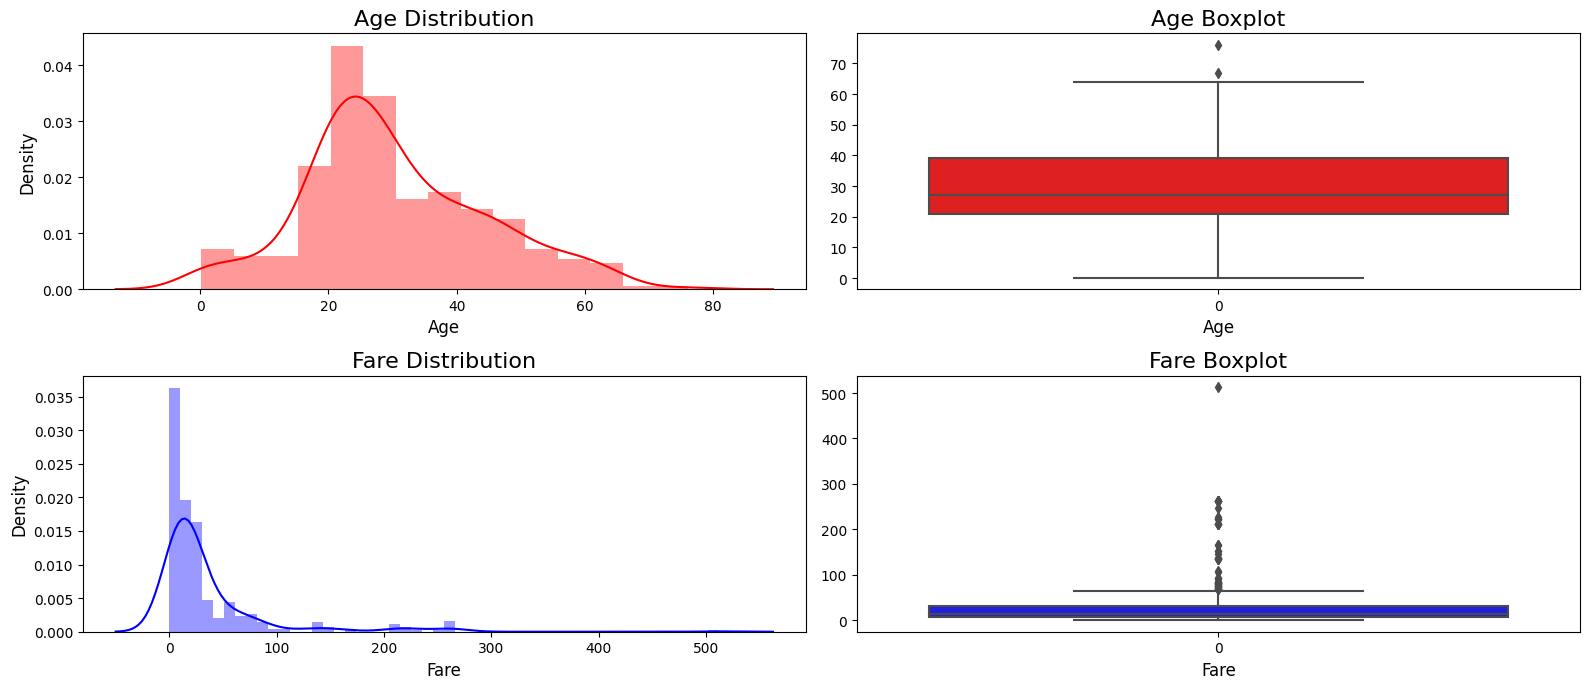

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Plotting the Age distribution with a red color scheme
plt.subplot(2, 2, 1)
sns.distplot(titanic['Age'], color='red')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(titanic['Age'], color='red')
plt.title('Age Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)

# Plotting the Fare distribution with a green color scheme
plt.subplot(2, 2, 3)
sns.distplot(titanic['Fare'], color='blue')
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(titanic['Fare'], color='blue')
plt.title('Fare Boxplot', fontsize=16)
plt.xlabel('Fare', fontsize=12)

plt.tight_layout()
plt.show()


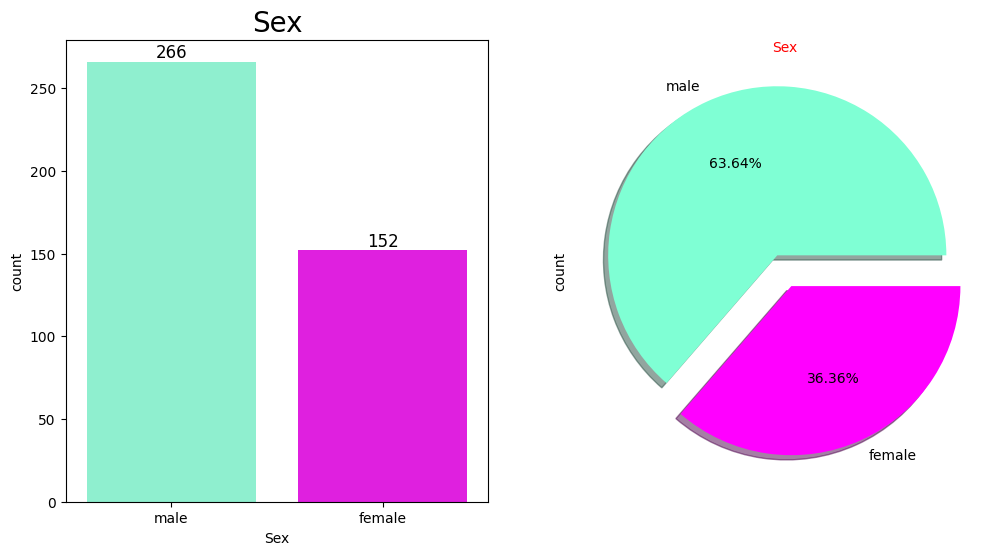

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
colors = ["Aquamarine", "Magenta"]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1 - Countplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=titanic, palette=colors)
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")  # Add labels to the bars
plt.title("Sex", fontsize=20)

# Subplot 2 - Pie chart
ax2 = plt.subplot(1, 2, 2)
titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=colors, ax=ax2)
ax2.set_title(label="Sex", fontsize=20, color='Red', font='Lucida Calligraphy')

# Show the plot
plt.show()


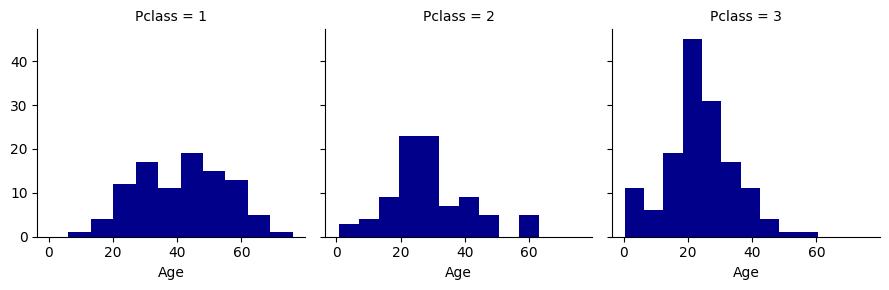

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame

# Set the grape color
grape_color = "#00008B"

# Create a FacetGrid
g = sns.FacetGrid(titanic, col="Pclass")

# Map the histograms with the specified color
g = g.map(plt.hist, "Age", color=grape_color)

# Show the plot
plt.show()


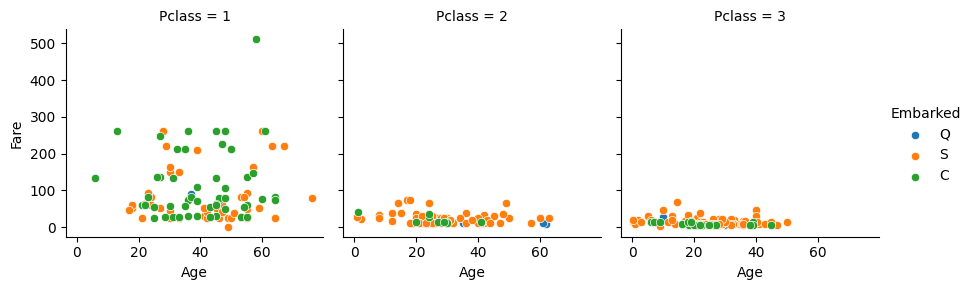

In [13]:
g = sns.FacetGrid(titanic, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

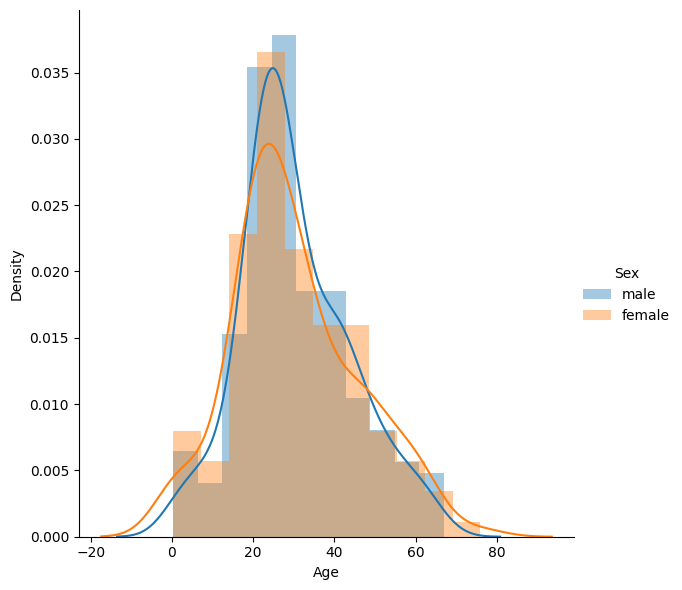

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

Another way to show the data is by using FacetGrid to display several kernel density plots together on a single graph.

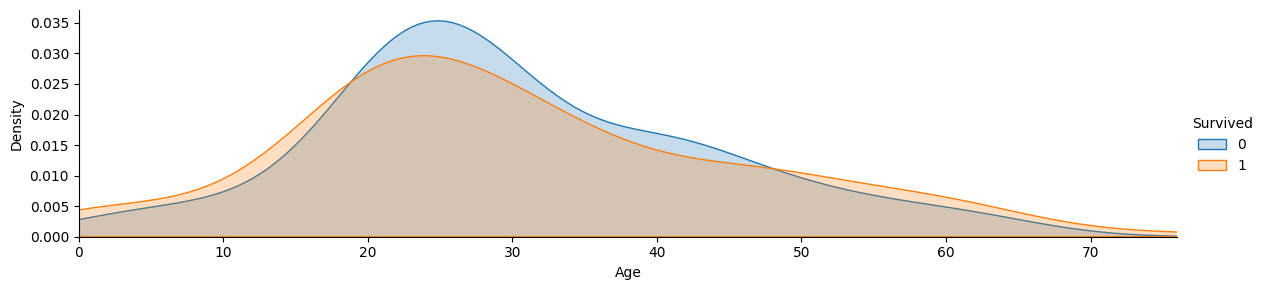

In [15]:
fig = sns.FacetGrid(titanic, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

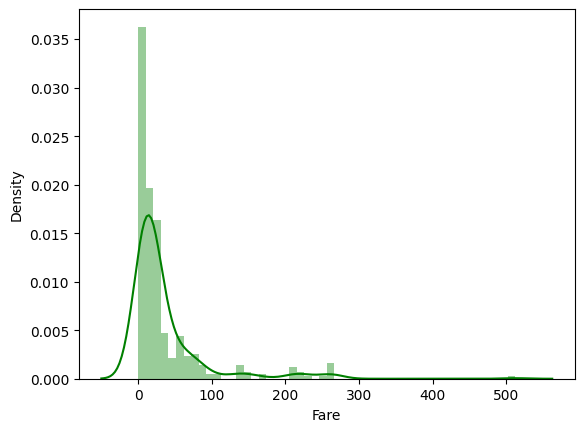

In [16]:
sns.distplot(titanic['Fare'],color="g")
plt.show()

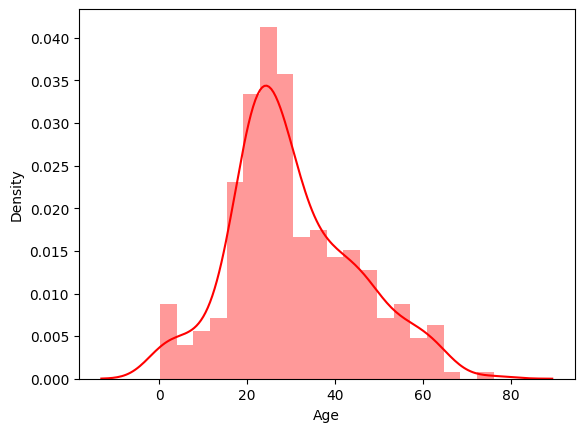

In [17]:
sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)
plt.show()

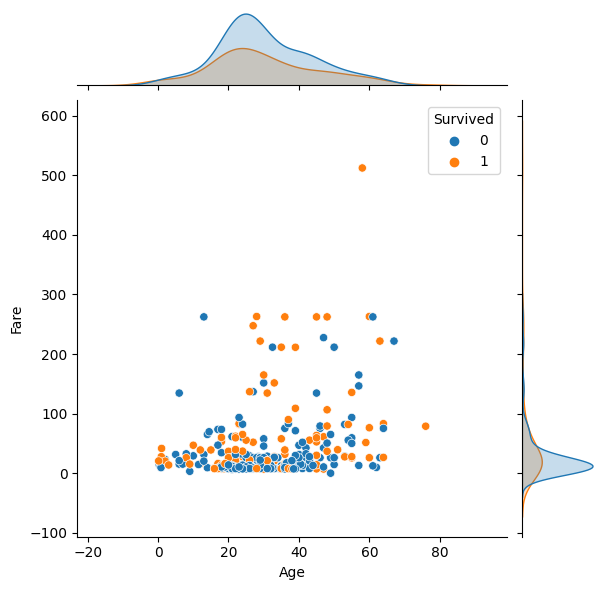

In [18]:
sns.jointplot(x="Age",y="Fare",data=titanic,color="Magenta",hue="Survived")
plt.show()

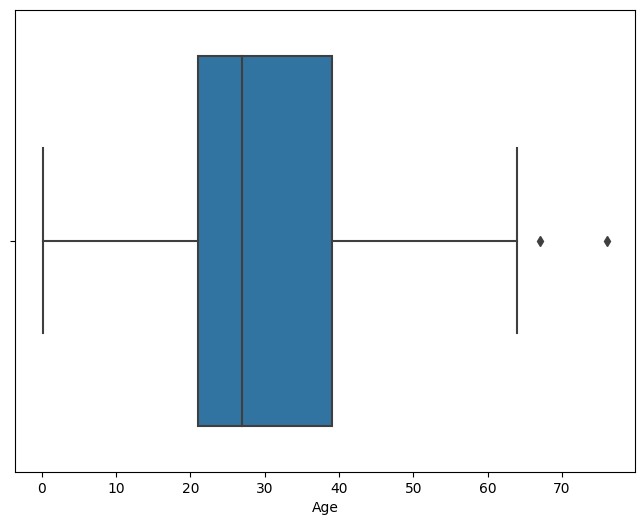

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=titanic["Age"])
plt.show()

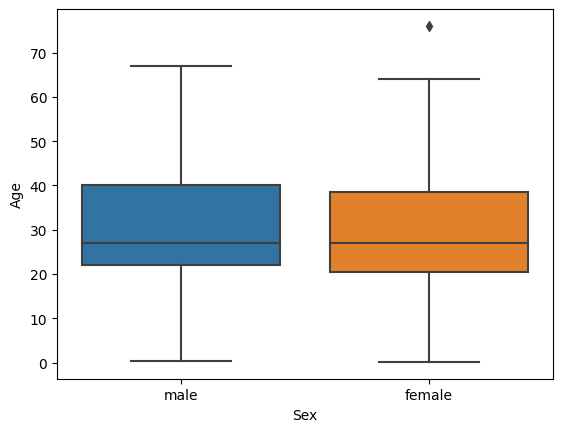

In [20]:
sns.boxplot(x='Sex', y = 'Age',data= titanic)
plt.show()

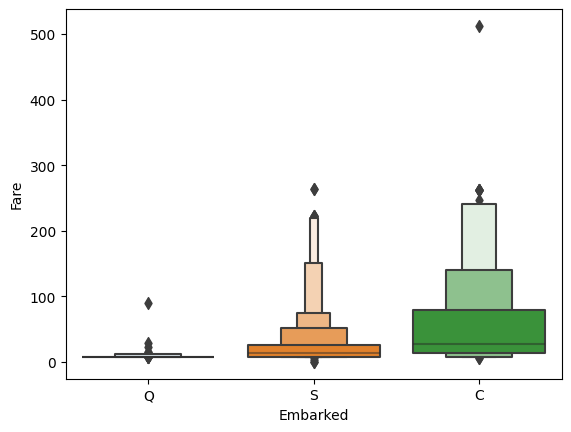

In [21]:
sns.boxenplot(y="Fare", x="Embarked", data=titanic)
plt.show()

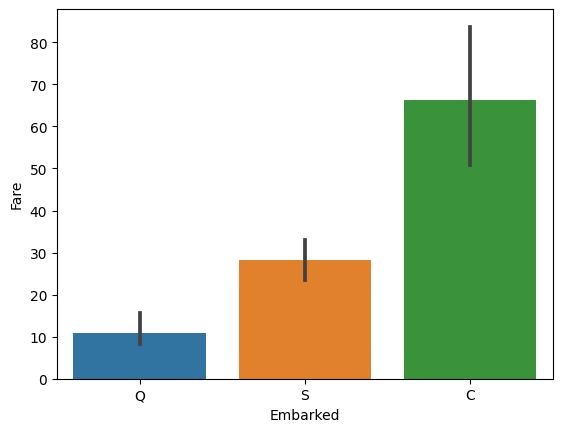

In [22]:
sns.barplot(y='Fare',x='Embarked',data=titanic)
plt.show()

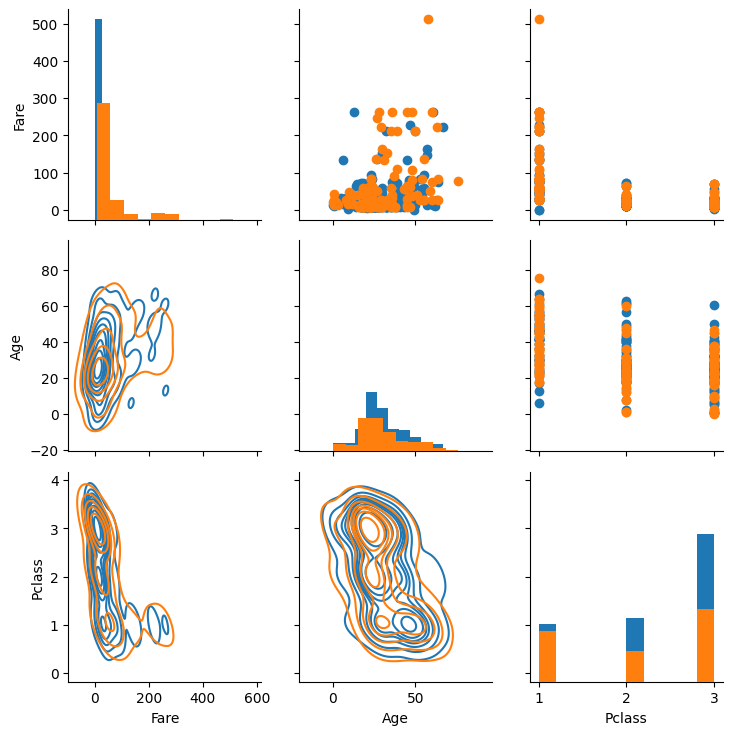

In [23]:
titanic_g = sns.PairGrid(titanic,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

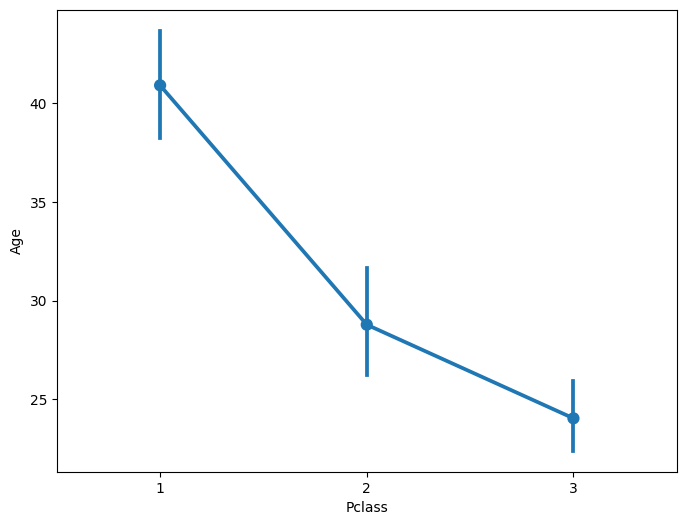

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="Pclass", y="Age", data=titanic)
plt.show()

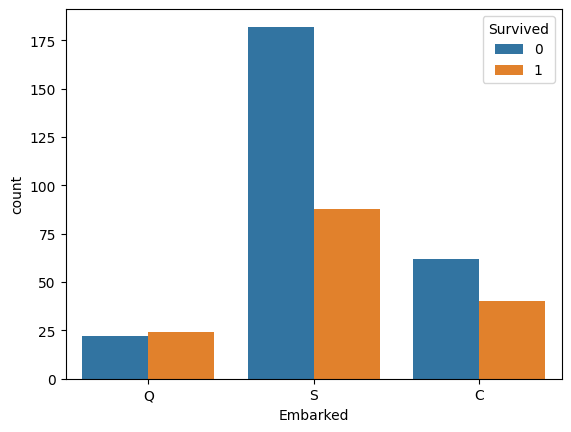

In [25]:
sns.countplot(data = titanic,x= 'Embarked',hue='Survived')
plt.show()

Airline vs Price

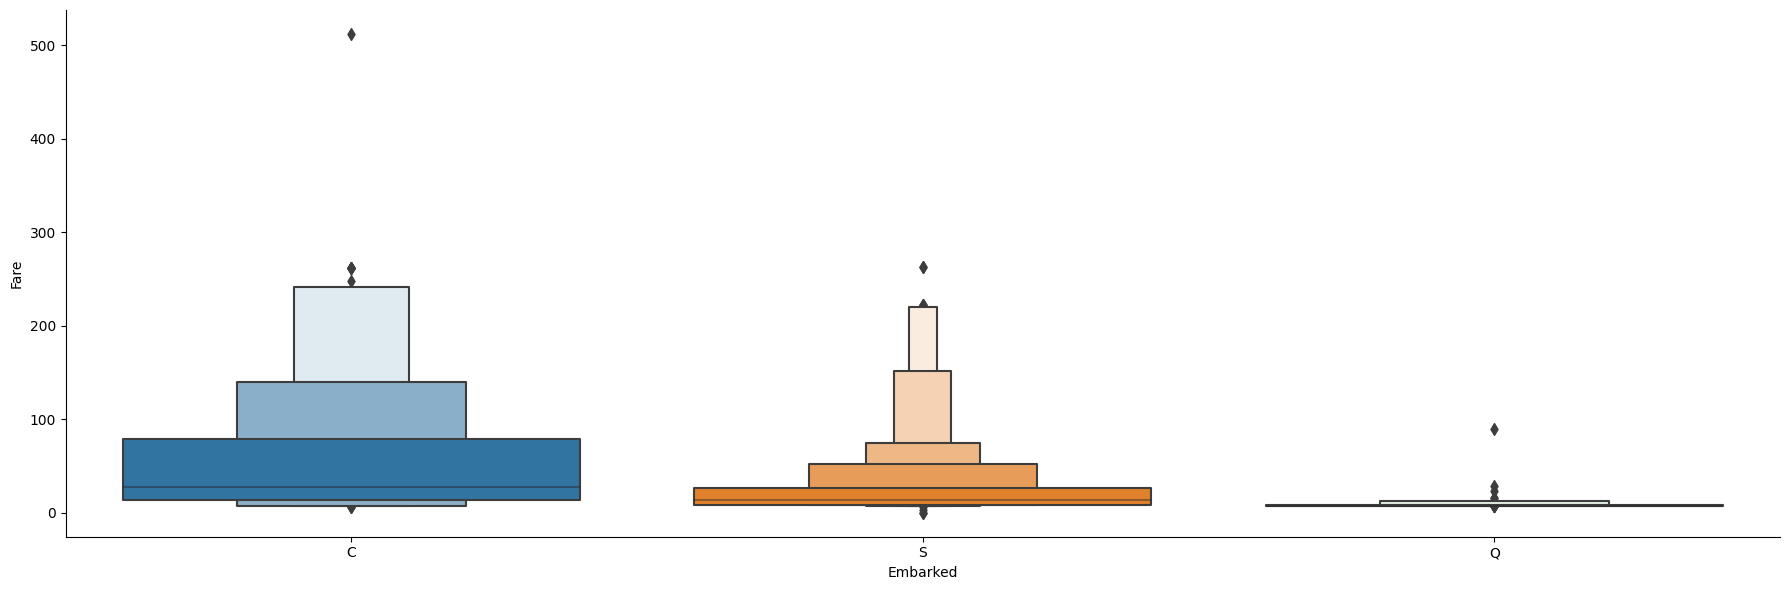

In [26]:
sns.catplot(y = "Fare", x = "Embarked", data = titanic.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

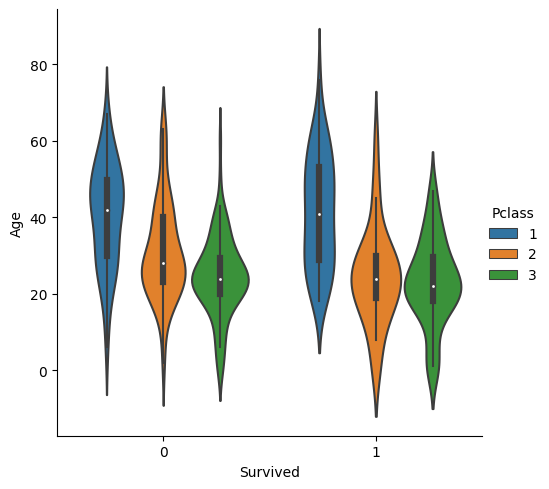

In [27]:
sns.catplot(data=titanic,x='Survived',y='Age',hue='Pclass',kind="violin")
plt.show()

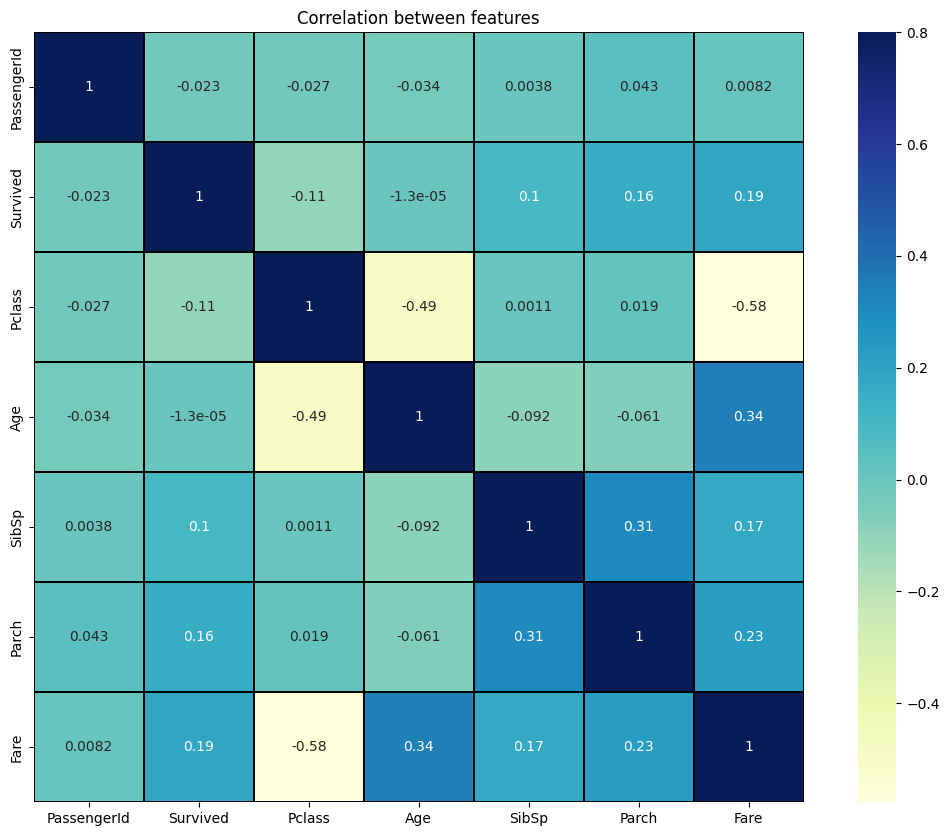

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the Titanic dataset into the 'titanic' DataFrame

# Drop non-numeric columns or select only numeric columns
numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()


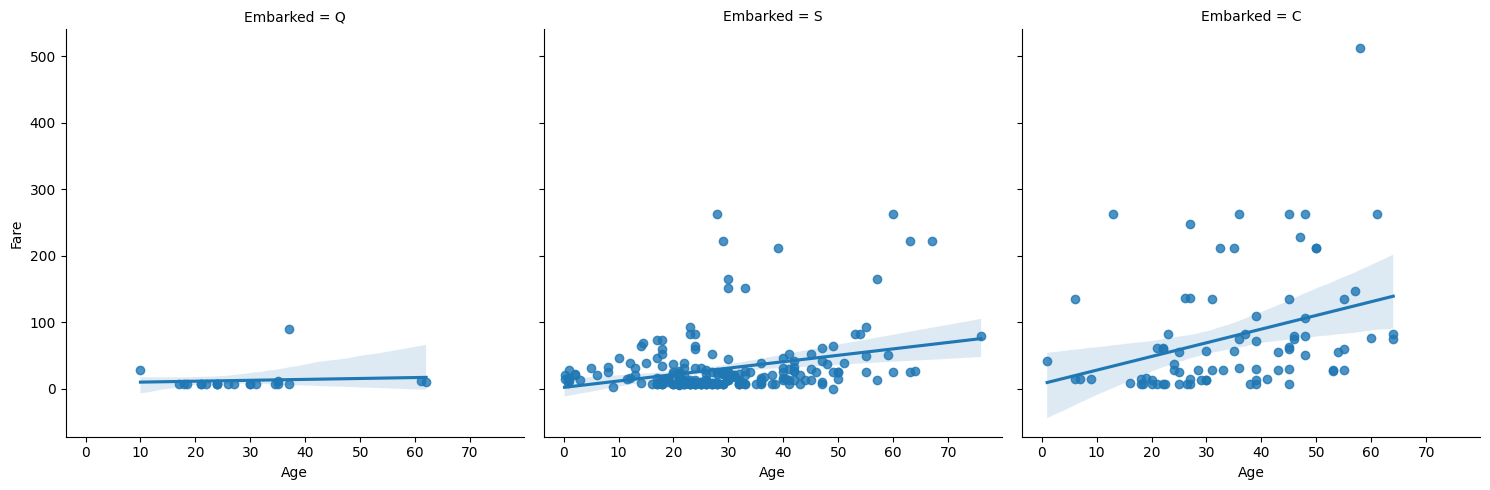

In [29]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=titanic)

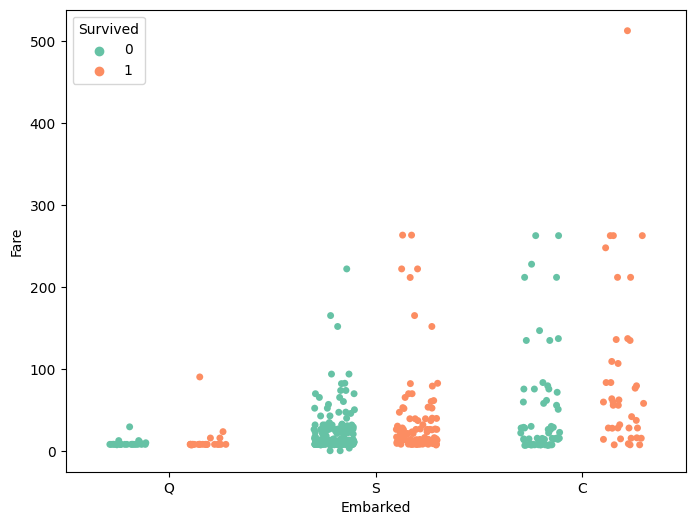

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Embarked", y="Fare", hue="Survived",data=titanic, jitter=0.2, palette="Set2", dodge=True)
plt.show()

what average of ages in each categorey

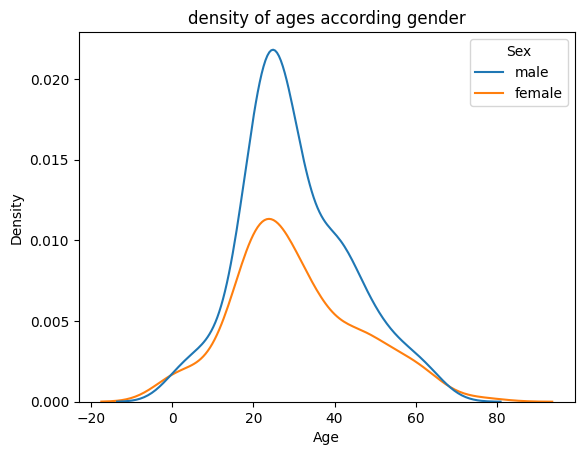

In [31]:

sns.kdeplot(data = titanic , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

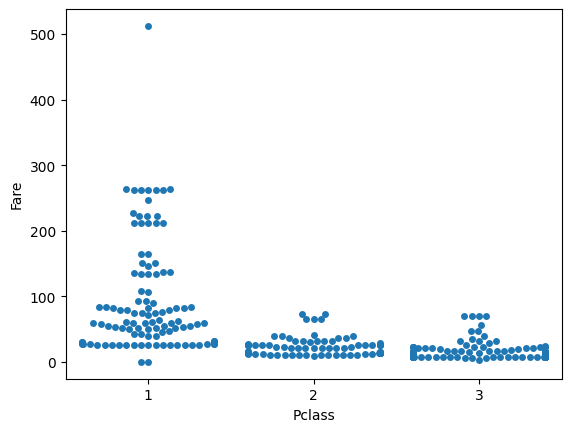

In [32]:
sns.swarmplot(x="Pclass", y="Fare", data=titanic)
plt.show()

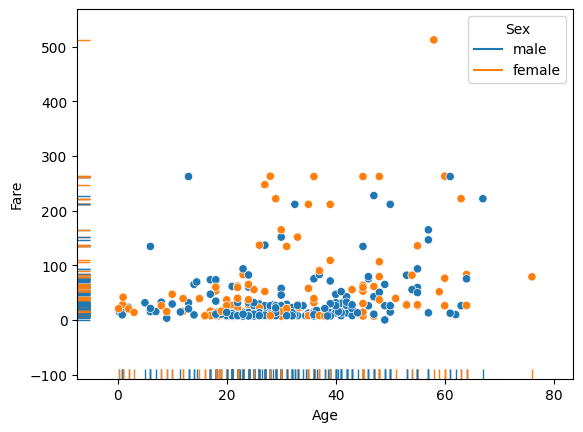

In [33]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Sex")
sns.rugplot(data=titanic, x="Age", y="Fare", hue="Sex")
plt.show()

# Data Preprocessing

Finding the Null value in data

In [34]:
titanic.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [35]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [36]:
missing(titanic)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# Various methods to show where data is missing

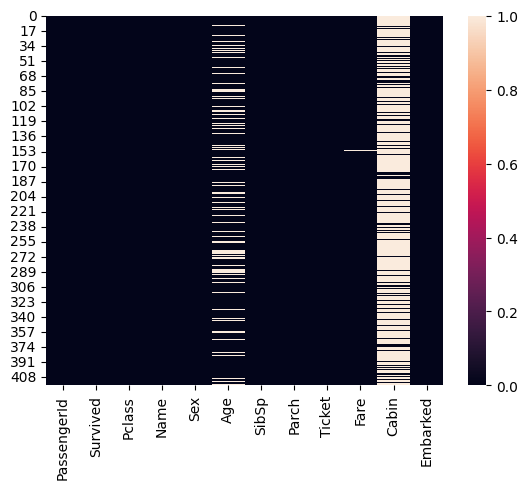

In [37]:
sns.heatmap(titanic.isnull());

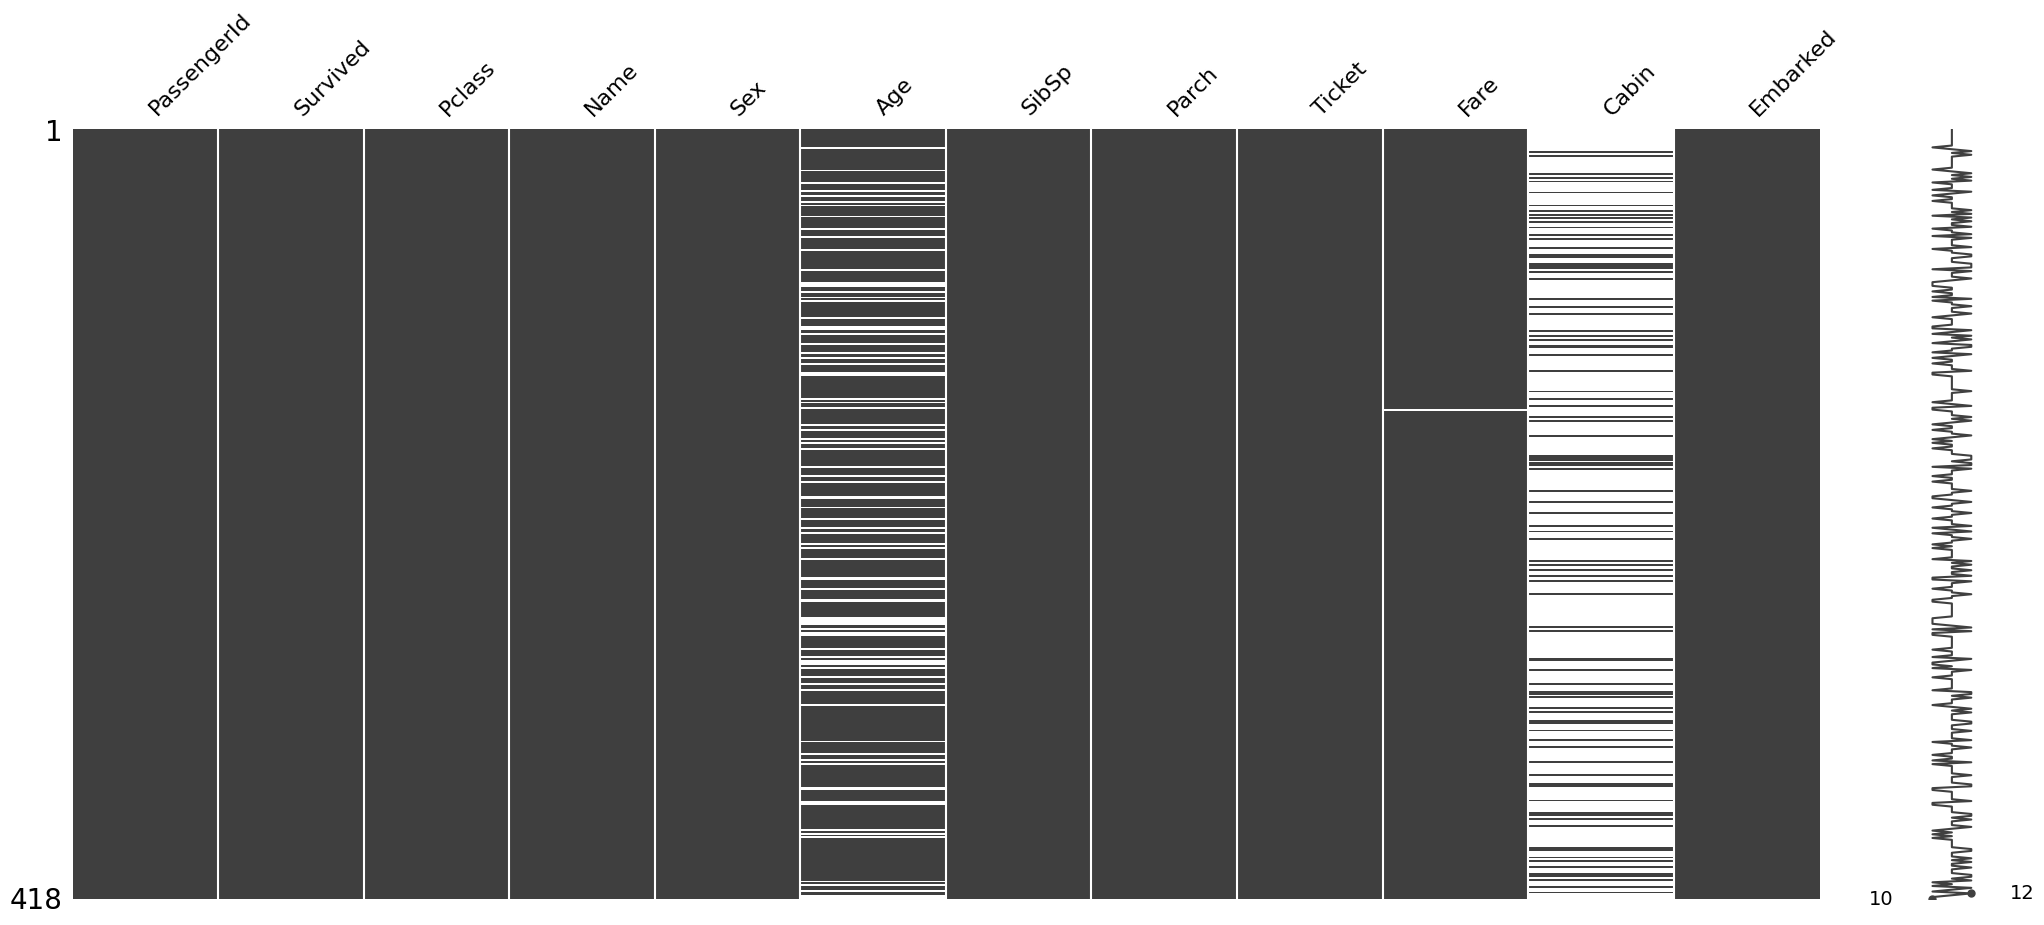

In [38]:
import missingno as msno
msno.matrix(titanic)
plt.show()

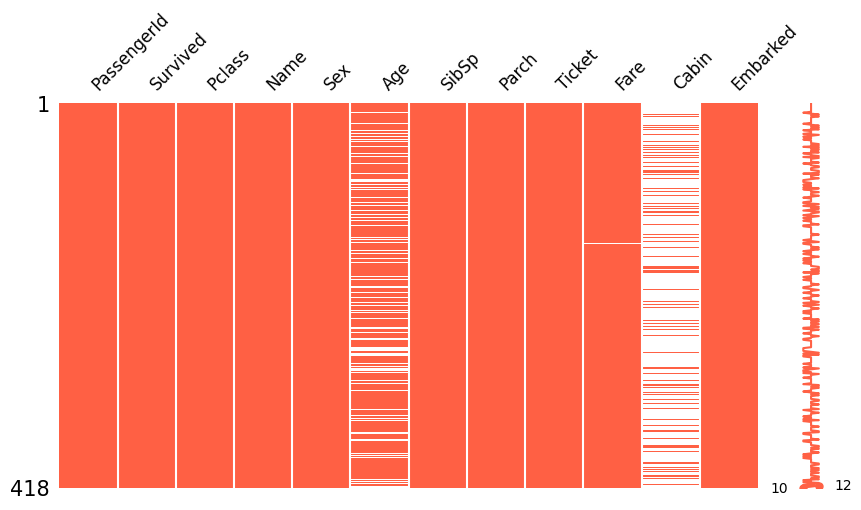

In [39]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

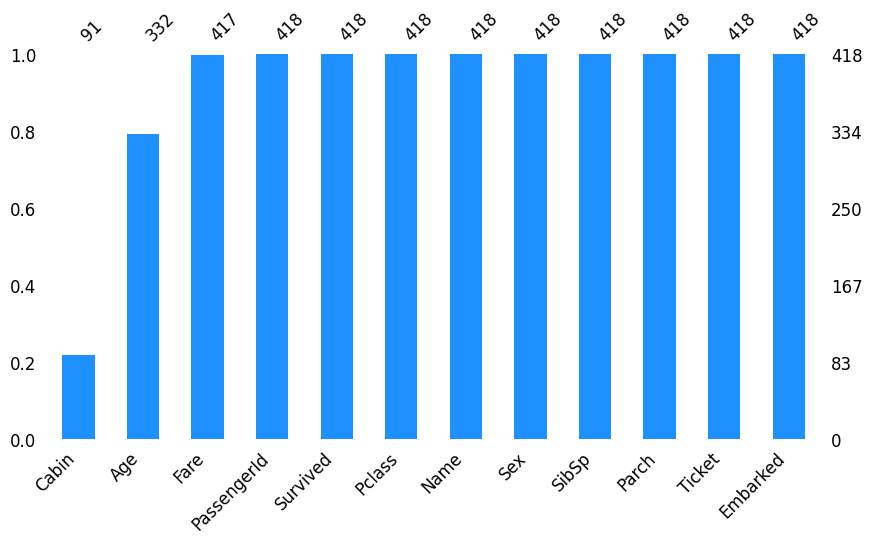

In [40]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

# Taking out the empty spaces from the Titanic dataset

In [41]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [42]:
# Drop the columns 
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


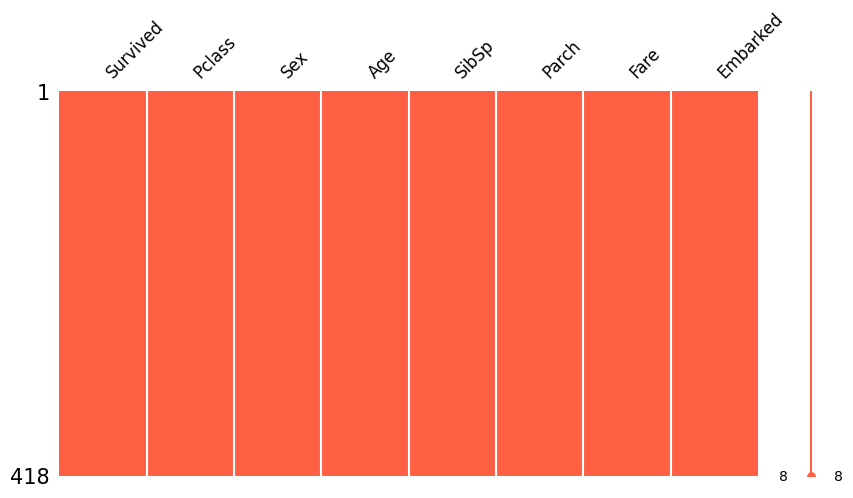

In [43]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

In [44]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2
5,1,1,1,14.0,0,0,9.2250,2
6,2,1,2,30.0,0,0,7.6292,1
7,1,2,1,26.0,1,1,29.0000,2
8,2,1,2,18.0,0,0,7.2292,3
9,1,1,1,21.0,2,0,24.1500,2


# Splitting Independent and Dependent Variable

In [45]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

# Splitting train and test set

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [47]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00000,0,2,83.1583,3
201,1,1,0.33000,0,2,14.4000,2
336,2,1,32.00000,0,0,13.0000,2
187,1,1,17.00000,2,0,8.0500,2
214,1,2,38.00000,4,2,7.7750,2
283,1,2,9.00000,1,1,15.2458,3
19,1,2,45.00000,0,0,7.2250,3
282,1,2,30.27259,0,0,7.7500,1
142,3,1,61.00000,1,3,262.3750,3
348,2,1,24.00000,0,0,13.5000,2


In [48]:
y.head(10)

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Survived, dtype: int64

# Model Implementation

**Logestic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lr)))

Logistic Regression Accuracy:  100.0%
MAE: 0.0
MSE: 0.0
RMSE: 0.0


**Random Forest Classifier (criterion = 'entropy')**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Random Forest Classifier (criterion = 'gini')**

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Naive Bayes GaussianNB Classifier**

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

print("Training set score: {:.2f}".format(Gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Gnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Gnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Gnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Gnb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Naive Bayes BernoulliNB ClassifierNaive Bayes BernoulliNB Classifier**

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred_Bnb = Bnb.predict(X_test)

print("Training set score: {:.2f}".format(Bnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Bnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Bnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Bnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Bnb))

Training set score: 0.68
Test set score: 0.63
Accuracy Score: 0.63
Confusion Matrix: 
 [[65 11]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.65      0.86      0.74        76
           1       0.58      0.30      0.39        50

    accuracy                           0.63       126
   macro avg       0.61      0.58      0.57       126
weighted avg       0.62      0.63      0.60       126



**Multi Layer Perceptron**

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_mlp)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_mlp))
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))

Training set score: 0.98
Test set score: 0.98
Accuracy Score: 0.98
Confusion Matrix: 
 [[76  0]
 [ 3 47]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.94      0.97        50

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.97       126
weighted avg       0.98      0.98      0.98       126



**K nearest neighbour**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.72
Test set score: 0.65
Accuracy Score: 0.65
Confusion Matrix: 
 [[67  9]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        76
           1       0.62      0.30      0.41        50

    accuracy                           0.65       126
   macro avg       0.64      0.59      0.58       126
weighted avg       0.64      0.65      0.61       126



**Extra Tree Classifier**

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

print("Training set score: {:.2f}".format(et_100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(et_100.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_et_100)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_et_100))
print("Classification_Report: \n",classification_report(y_test,y_pred_et_100))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Support Vector Classifier**

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Support Vector Classifier**

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_rbf = SVC(kernel = "rbf", gamma=2, C=1)
svc_rbf.fit(X_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

print("Training set score: {:.2f}".format(svc_rbf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_rbf.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_rbf)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_rbf))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_rbf))

Training set score: 1.00
Test set score: 0.65
Accuracy Score: 0.65
Confusion Matrix: 
 [[76  0]
 [44  6]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       1.00      0.12      0.21        50

    accuracy                           0.65       126
   macro avg       0.82      0.56      0.49       126
weighted avg       0.78      0.65      0.55       126



**Stochastic Gradient Descent**

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

print("Training set score: {:.2f}".format(sgd.score(X_train, y_train)))
print("Test set score: {:.2f}".format(sgd.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_sgd)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_sgd))
print("Classification_Report: \n",classification_report(y_test,y_pred_sgd))

Training set score: 0.82
Test set score: 0.83
Accuracy Score: 0.83
Confusion Matrix: 
 [[55 21]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        76
           1       0.70      1.00      0.83        50

    accuracy                           0.83       126
   macro avg       0.85      0.86      0.83       126
weighted avg       0.88      0.83      0.83       126



**Adaboost Classifie**

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print("Training set score: {:.2f}".format(ada.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ada.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_ada)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_ada))
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Decision Tree Classifier**

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Decision Tree Classifier with criterion gini index**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print("Training set score: {:.2f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_gini.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gini)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gini))
print("Classification_Report: \n",classification_report(y_test,y_pred_gini))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Visualize decision-trees**

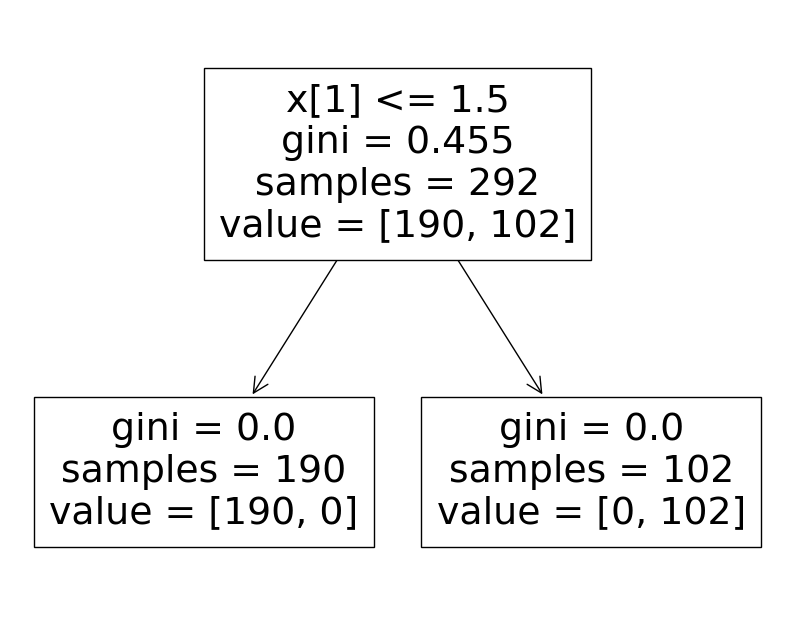

In [64]:

plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

**Decision Tree Classifier with criterion entropy**

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

print("Training set score: {:.2f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_en.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_en)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_en))
print("Classification_Report: \n",classification_report(y_test,y_pred_en))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



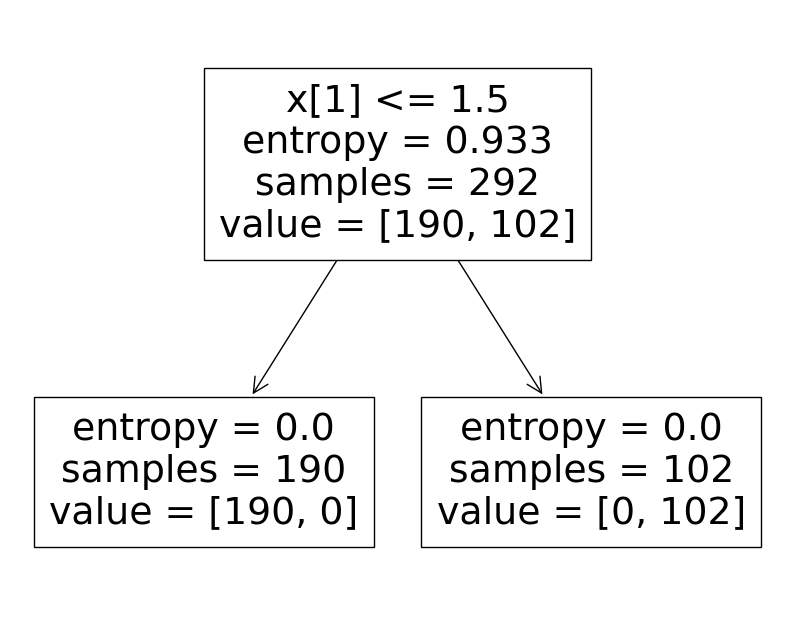

In [66]:
plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

**Gradient boosting machine**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

print("Training set score: {:.2f}".format(gbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gbm)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gbm))
print("Classification_Report: \n",classification_report(y_test,y_pred_gbm))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Light gbm Classifier**

In [68]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred_lgb = lgb.predict(X_test)

print("Training set score: {:.2f}".format(gbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lgb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_lgb))

[LightGBM] [Info] Number of positive: 102, number of negative: 190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349315 -> initscore=-0.622051
[LightGBM] [Info] Start training from score -0.622051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**Linear Discriminant Analysis**

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
y_pred_LDA = LDA.predict(X_test)

print("Training set score: {:.2f}".format(LDA.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LDA.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_LDA)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_LDA))
print("Classification_Report: \n",classification_report(y_test,y_pred_LDA))

Training set score: 0.67
Test set score: 0.62
Accuracy Score: 0.62
Confusion Matrix: 
 [[72  4]
 [44  6]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.62      0.95      0.75        76
           1       0.60      0.12      0.20        50

    accuracy                           0.62       126
   macro avg       0.61      0.53      0.47       126
weighted avg       0.61      0.62      0.53       126



**Quadratic Discriminant Analysis**

In [70]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
y_pred_QDA = QDA.predict(X_test)

print("Training set score: {:.2f}".format(QDA.score(X_train, y_train)))
print("Test set score: {:.2f}".format(QDA.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_QDA)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_QDA))
print("Classification_Report: \n",classification_report(y_test,y_pred_QDA))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**RBF Classifier**

In [71]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RBF = GaussianProcessClassifier(1.0 * RBF(1.0))
RBF.fit(X_train,y_train)
y_pred_RBF = RBF.predict(X_test)

print("Training set score: {:.2f}".format(RBF.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RBF.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_RBF)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_RBF))
print("Classification_Report: \n",classification_report(y_test,y_pred_RBF))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Perception Classification**

In [72]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Perceptron = Perceptron()
Perceptron.fit(X_train,y_train)
y_pred_Perceptron = Perceptron.predict(X_test)

print("Training set score: {:.2f}".format(Perceptron.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Perceptron.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Perceptron)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Perceptron))
print("Classification_Report: \n",classification_report(y_test,y_pred_Perceptron))

Training set score: 0.77
Test set score: 0.83
Accuracy Score: 0.83
Confusion Matrix: 
 [[65 11]
 [11 39]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        76
           1       0.78      0.78      0.78        50

    accuracy                           0.83       126
   macro avg       0.82      0.82      0.82       126
weighted avg       0.83      0.83      0.83       126



**Gaussian Process Classifier**

In [73]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
GPC = GaussianProcessClassifier()
GPC.fit(X_train,y_train)
y_pred_GPC = GPC.predict(X_test)

print("Training set score: {:.2f}".format(GPC.score(X_train, y_train)))
print("Test set score: {:.2f}".format(GPC.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_GPC)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_GPC))
print("Classification_Report: \n",classification_report(y_test,y_pred_GPC))

Training set score: 0.99
Test set score: 0.75
Accuracy Score: 0.75
Confusion Matrix: 
 [[64 12]
 [20 30]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        76
           1       0.71      0.60      0.65        50

    accuracy                           0.75       126
   macro avg       0.74      0.72      0.73       126
weighted avg       0.74      0.75      0.74       126



**NuSVC**

In [74]:
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
NuSVC = NuSVC(kernel = 'rbf', random_state = 0)
NuSVC.fit(X_train,y_train)
y_pred_NuSVC = NuSVC.predict(X_test)

print("Training set score: {:.2f}".format(NuSVC.score(X_train, y_train)))
print("Test set score: {:.2f}".format(NuSVC.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_NuSVC)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_NuSVC))
print("Classification_Report: \n",classification_report(y_test,y_pred_NuSVC))

Training set score: 0.98
Test set score: 0.98
Accuracy Score: 0.98
Confusion Matrix: 
 [[74  2]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        50

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



**Passive Aggressive Classifier**

In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
PAC = PassiveAggressiveClassifier(random_state=0)
PAC.fit(X_train,y_train)
y_pred_PAC = PAC.predict(X_test)

print("Training set score: {:.2f}".format(PAC.score(X_train, y_train)))
print("Test set score: {:.2f}".format(PAC.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_PAC)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_PAC))
print("Classification_Report: \n",classification_report(y_test,y_pred_PAC))

Training set score: 0.92
Test set score: 0.92
Accuracy Score: 0.92
Confusion Matrix: 
 [[73  3]
 [ 7 43]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        76
           1       0.93      0.86      0.90        50

    accuracy                           0.92       126
   macro avg       0.92      0.91      0.92       126
weighted avg       0.92      0.92      0.92       126



**Hist Gradient Boosting Classifier**

In [76]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgbm = HistGradientBoostingClassifier()
hgbm.fit(X_train,y_train)
y_pred_hgbm = hgbm.predict(X_test)

print("Training set score: {:.2f}".format(hgbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(hgbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_hgbm)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_hgbm))
print("Classification_Report: \n",classification_report(y_test,y_pred_hgbm))

accuracy = accuracy_score(y_test, y_pred_hgbm) * 100
print("Gradient Boosting Classifie Accuracy   :  " +str(round(accuracy,2)) + '%')

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Gradient Boosting Classifie Accuracy   :  100.0%


**XGBoost**

In [77]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [78]:
print ("Thank You So Much................. ")

Thank You So Much................. 
